# Lab 3 Classification Aidan Fitzsimmons

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.api.types import is_numeric_dtype
from sklearn import preprocessing
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import pydotplus 
import io
from IPython.display import Image
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score
import matplotlib.pyplot as pl
#Scale large numbers from 0=1
#predict the class
#

In [2]:
german = pd.read_csv('german.data', header=None, sep = ' ')
wave = pd.read_csv('waveform.data')

In [3]:
german.columns = ["Status of existing checking account",
                "Duration in month",
                "Credit history",
                "Purpose",
                "Credit amount",
                "Savings account/bonds",
                "Present employment since",
                "Installment rate in percentage of disposable income",
                "Personal status and sex",
                "Other debtors / guarantors",
                "Present residence since",
                "Property",
                "Age in years",
                "Other installment plans",
                "Housing",
                "Number of existing credits at this bank",
                "Job",
                "Number of people being liable to provide maintenance for",
                "Telephone",
                "Foreign Worker",
                "Class"
               ]

In [4]:
wave.columns = ["1",
                "2",
                "3",
                "4",
                "5",
                "6",
                "7",
                "8",
                "9",
                "10",
                "11",
                "12",
                "13",
                "14",
                "15",
                "16",
                "17",
                "18",
                "19",
                "20",
                "21",
                "Class"
               ]

In [5]:
le = preprocessing.LabelEncoder()
for col in german.columns:
    if is_numeric_dtype(german[col]) == False:
        le.fit(german[col])
        german[col] = le.transform(german[col])

In [6]:
#normalize the Credit Amount
german['Credit amount'] = MinMaxScaler().fit_transform(np.array(german['Credit amount']).reshape(-1,1))
german.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign Worker,Class
0,0,6,4,4,0.050567,4,4,4,2,0,...,0,67,2,1,2,2,1,1,0,1
1,1,48,2,4,0.313690,0,2,2,1,0,...,0,22,2,1,1,2,1,0,0,2
2,3,12,4,7,0.101574,0,3,2,2,0,...,0,49,2,1,1,1,2,0,0,1
3,0,42,2,3,0.419941,0,3,2,2,2,...,1,45,2,2,1,2,2,0,0,1
4,0,24,3,0,0.254209,0,2,3,2,0,...,3,53,2,2,2,2,2,0,0,2


In [7]:
Y = german['Class']
X = german.drop(['Class'],axis=1)

In [8]:
Ywave = wave['Class']
Xwave = wave.drop(['Class'],axis=1)

## Knn with n = 5 Minkowski Metrics

In [9]:
testAcc = []
testf = []
testp = []

testAccwave = []
testfwave = []
testpwave = []

for i in range(5):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
    Xwave_train, Xwave_test, Ywave_train, Ywave_test = train_test_split(Xwave, Ywave, test_size=0.1)
    
    clf = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    clf.fit(X_train, Y_train)
    
    clfwave = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    clfwave.fit(Xwave_train, Ywave_train)
    
    Y_predTest = clf.predict(X_test)
    Ywave_predTest = clfwave.predict(Xwave_test)
    
    testAcc.append(accuracy_score(Y_test, Y_predTest))
    testf.append(f1_score(Y_test, Y_predTest, average='weighted'))
    testp.append(precision_score(Y_test, Y_predTest,average= 'weighted'))
    
    testAccwave.append(accuracy_score(Ywave_test, Ywave_predTest))
    testfwave.append(f1_score(Ywave_test, Ywave_predTest, average='weighted'))
    testpwave.append(precision_score(Ywave_test, Ywave_predTest,average= 'weighted'))

## Default Parameters 

In [10]:
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score
#Need both sets
#Hold Out
testAccd = []
testfd = []
testpd = []

testAccwaved = []
testfwaved = []
testpwaved = []


for i in range(5):
    #split data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
    Xwave_train, Xwave_test, Ywave_train, Ywave_test = train_test_split(Xwave, Ywave, test_size=0.1)
    #create n train model
    clf = tree.DecisionTreeClassifier()
    clfwave = tree.DecisionTreeClassifier()
    
    #features and labels
    clf.fit(X_train,Y_train)
    clfwave.fit(Xwave_train,Ywave_train)
    
    Y_predTest = clf.predict(X_test)
    Ywave_predTest = clfwave.predict(Xwave_test)
    
    testAccd.append(accuracy_score(Y_test, Y_predTest))
    testfd.append(f1_score(Y_test, Y_predTest, average='weighted'))
    testpd.append(precision_score(Y_test, Y_predTest,average= 'weighted'))

    testAccwaved.append(accuracy_score(Ywave_test, Ywave_predTest))
    testfwaved.append(f1_score(Ywave_test, Ywave_predTest, average='weighted'))
    testpwaved.append(precision_score(Ywave_test, Ywave_predTest,average= 'weighted'))

In [11]:
finalAccC = np.mean(testAcc)
finalAccwaveC = np.mean(testAccwave)

finalfdC = np.mean(testf)
finalfdwaveC = np.mean(testfwave)

finalpC = np.mean(testp)
finalpwaveC = np.mean(testpwave)

In [12]:
finalAcc = np.mean(testAccd)
finalAccwave = np.mean(testAccwaved)

finalfd = np.mean(testfd)
finalfdwave = np.mean(testfwaved)

finalp = np.mean(testpd)
finalpwave = np.mean(testpwaved)

## Compare

## German Data

Text(0.5, 1.0, 'German Data, Test Averages, Knn')

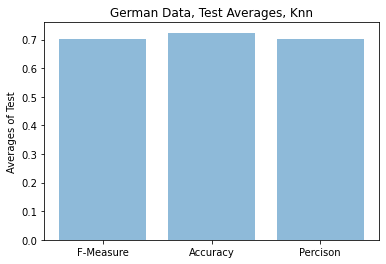

In [13]:
objects = ('F-Measure', 'Accuracy', 'Percison')
y_pos = np.arange(len(objects))
performance = [finalfdC,finalAccC,finalpC]

pl.bar(y_pos, performance, align='center', alpha=0.5)
pl.xticks(y_pos, objects)
pl.ylabel('Averages of Test')
pl.title('German Data, Test Averages, Knn')

Text(0.5, 1.0, 'German Data, Test Averages, decision tree classifier')

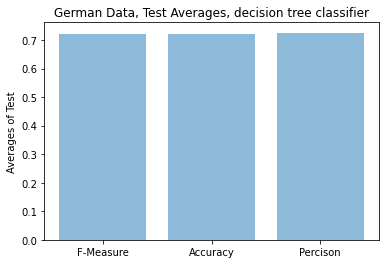

In [14]:
objects = ('F-Measure', 'Accuracy', 'Percison')
y_pos = np.arange(len(objects))
performance = [finalfd, finalAcc, finalp]

pl.bar(y_pos, performance, align='center', alpha=0.5)
pl.xticks(y_pos, objects)
pl.ylabel('Averages of Test')
pl.title('German Data, Test Averages, decision tree classifier')

## Wave Data

Text(0.5, 1.0, 'Wave Data, Test Averages, knn')

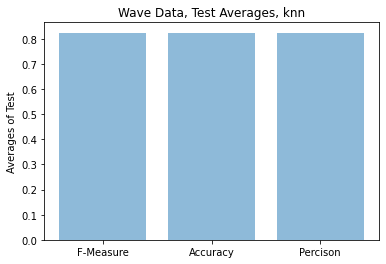

In [15]:
objects = ('F-Measure', 'Accuracy', 'Percison')
y_pos = np.arange(len(objects))
performance = [finalfdwaveC,finalAccwaveC,finalpwaveC]

pl.bar(y_pos, performance, align='center', alpha=0.5)
pl.xticks(y_pos, objects)
pl.ylabel('Averages of Test')
pl.title('Wave Data, Test Averages, knn')

Text(0.5, 1.0, 'Wave Data, Test Averages, decision tree classifier')

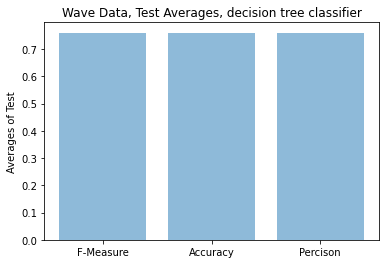

In [16]:
objects = ('F-Measure', 'Accuracy', 'Percison')
y_pos = np.arange(len(objects))
performance = [finalfdwave, finalAccwave, finalpwave]

pl.bar(y_pos, performance, align='center', alpha=0.5)
pl.xticks(y_pos, objects)
pl.ylabel('Averages of Test')
pl.title('Wave Data, Test Averages, decision tree classifier')

## Model Selection

In [17]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]

testf = []
testfwave = []

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, train_size=0.9)

Xwave_train, Xwave_test, Ywave_train, Ywave_test = train_test_split(Xwave, Ywave, test_size=0.1)
Xwave_train, Xwave_valid, Ywave_train, Ywave_valid = train_test_split(Xwave_train, Ywave_train, train_size=0.9)    

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clfwave = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    
    clf.fit(X_train, Y_train)
    clfwave.fit(Xwave_train, Ywave_train)
    
    Y_predTest = clf.predict(X_valid)
    Ywave_predTest = clfwave.predict(Xwave_valid)
    
    testf.append(f1_score(Y_valid, Y_predTest, average='weighted'))
    testfwave.append(f1_score(Ywave_valid, Ywave_predTest, average='weighted'))

## The best model for german valid data, k = 15

Text(0.5, 1.0, 'German, Test Averages, Knn')

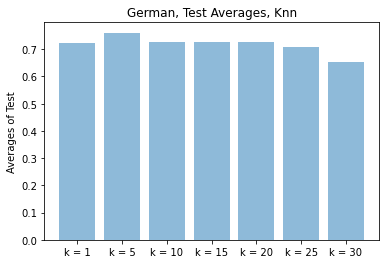

In [18]:
objects = ('k = 1', 'k = 5', 'k = 10','k = 15','k = 20','k = 25','k = 30',)
y_pos = np.arange(len(objects))
performance = testf

pl.bar(y_pos, performance, align='center', alpha=0.5)
pl.xticks(y_pos, objects)
pl.ylabel('Averages of Test')
pl.title('German, Test Averages, Knn')

## The best model for wave valid data, k = 20

Text(0.5, 1.0, 'Wave Data, Test Averages, Knn')

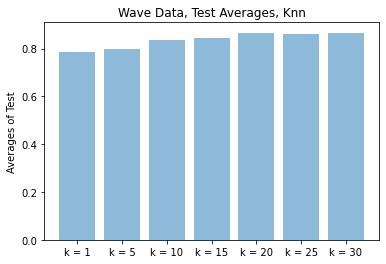

In [19]:
objects = ('k = 1', 'k = 5', 'k = 10','k = 15','k = 20','k = 25','k = 30',)
y_pos = np.arange(len(objects))
performance = testfwave

pl.bar(y_pos, performance, align='center', alpha=0.5)
pl.xticks(y_pos, objects)
pl.ylabel('Averages of Test')
pl.title('Wave Data, Test Averages, Knn')

## Validation on decision tree model

In [20]:
#########################################
# Training and Test set creation
#########################################

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, train_size=0.9)


Xwave_train, Xwave_test, Ywave_train, Ywave_test = train_test_split(Xwave, Ywave, test_size=0.1)
Xwave_train, Xwave_valid, Ywave_train, Ywave_valid = train_test_split(Xwave_train, Ywave_train, train_size=0.9)    

from sklearn import tree
from sklearn.metrics import accuracy_score

#########################################
# Model fitting and evaluation
#########################################

maxdepths = [2,3,4,5,6,7,8,9,10,15]


validf = []
validfwave = []

trainAccwave = np.zeros(len(maxdepths))
index = 0
for depth in maxdepths:
    
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, Y_train)
    
    clfwave = tree.DecisionTreeClassifier(max_depth=depth)
    clfwave = clfwave.fit(Xwave_train, Ywave_train)
    
    Y_predTest = clf.predict(X_valid)
    Ywave_predTest = clfwave.predict(Xwave_valid)
    
    validf.append(f1_score(Y_valid, Y_predTest, average='weighted'))
    validfwave.append(f1_score(Ywave_valid, Ywave_predTest, average='weighted'))
    
    index += 1

## Best Bin size for German data is 8

Text(0.5, 1.0, 'German, Test Averages, Knn')

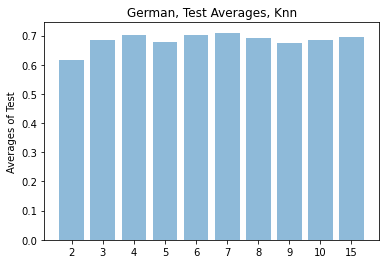

In [21]:
objects = ('2','3','4','5','6','7','8','9','10','15')
y_pos = np.arange(len(objects))
performance = validf

pl.bar(y_pos, performance, align='center', alpha=0.5)
pl.xticks(y_pos, objects)
pl.ylabel('Averages of Test')
pl.title('German, Test Averages, Knn')

## Best bin size for Wave data is 8

Text(0.5, 1.0, 'Wave Data, Test Averages, Knn')

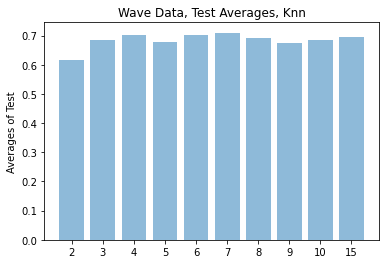

In [22]:
objects = ('2','3','4','5','6','7','8','9','10','15')
y_pos = np.arange(len(objects))
performance = validf

pl.bar(y_pos, performance, align='center', alpha=0.5)
pl.xticks(y_pos, objects)
pl.ylabel('Averages of Test')
pl.title('Wave Data, Test Averages, Knn')